# HW4

### Logistic regression

### EM algorithm

In [1497]:
from GaussDataGenerator import GaussianDataGenerator
from matplotlib import pyplot as plt
import math
import numpy as np
from IPython.display import Markdown,display,clear_output

### Logistic regression

- INPUT
    - number of data points, $n$
    - mean, variance of x1, $m_{x1}, v_{x1}$
    - mean, variance of y1, $m_{y1}, v_{y1}$
    - mean, variance of x2, $m_{x2}, v_{x2}$
    - mean, variance of y2, $m_{y2}, v_{y2}$
- FUNCTION
    - Generate $n$ data points to be D1 and D2 through Gaussian Data Generator
        - D1 (x,y) are generated by $N(m_{x1}, v_{x1}), N(m_{y1}, v_{y1})$
        - D2 (x,y) are generated by $N(m_{x2}, v_{x2}), N(m_{y2}, v_{y2})$
    - Use Logistic regression to separate D1 and D2
        - should implement Newton's and steepest gradient descent method during optimization
        - stop when determine convergence
- OUTPUT
    - confusion matrix
    - sensitivity
    - specificity
    
#### Steepest Gradient Descent

$$ \\
W_{n+1} = W_n + \bigtriangledown_{w}J = W_n + \frac{\partial J}{\partial W} \\
\bigtriangledown_{w}J = X^T[y_i - \frac{1}{1+e^{-X_iW}}] \\
= X^T \begin{bmatrix} y_1 - \frac{1}{1+e^{-X_1W}} \\ y_2 - \frac{1}{1+e^{-X_2W}} \\ \vdots \\ y_n - \frac{1}{1+e^{-X_nW}} \end{bmatrix} \\
X_i = [\phi_1(x_i), \phi_2(x_i), ..., \phi_D(x_i)]
$$

#### Newton's method

$$ \\
W_{n+1} = W_n + HJ(w)^{-1}\bigtriangledown_{w}J \\
HJ(w) = \begin{bmatrix}  \frac{\partial^2 J}{{\partial w_1}^2} & \frac{\partial^2 J}{{\partial w_1}{\partial w_2}} & \cdots & \frac{\partial^2 J}{{\partial w_1}{\partial w_d}} \\
\frac{\partial^2 J}{{\partial w_2}{\partial w_1}} & \frac{\partial^2 J}{{\partial w_2}^2} & \cdots & \frac{\partial^2 J}{{\partial w_2}{\partial w_d}} \\
\vdots & \vdots & \ddots & \vdots \\ 
\frac{\partial^2 J}{{\partial w_d}{\partial w_1}} & \cdots & \frac{\partial^2 J}{{\partial w_d}{\partial w_2}} & \frac{\partial^2 J}{{\partial w_d}^2} \end{bmatrix}
$$

In [1534]:
def generateDataSet(n, mx, vx, my, vy, target=0):
    genX = GaussianDataGenerator(mx, vx)
    genY = GaussianDataGenerator(my, vy)
    return np.array([[next(genX), next(genY)] for _ in range(n)]), np.array([target for _ in range(n)])

def convertFeature(xv):
    #xv = np.array(xv)
    return np.append([1] ,xv)

def generateHessionEye(d):
    D = np.eye(len(d))
    for i in range(len(d)):
        D[i][i] = d[i]
    return D

def crossAddList(a,b):
    crossList = []
    for z in zip(a,b):
        crossList += [z[0], z[1]]
    return crossList

def ShowMatrixByLatex(m,row_text=None, col_text=None, dtype="float"):
    latexstr = ""
    
    row = len(m)
    col = len(m[0])
    
    latexstr += r'\begin{bmatrix} '
    
    for i in range(row):
        if i != 0:
            latexstr += r' \\'
        
        for j in range(col):
            if j != 0:
                latexstr += " & "
            
            if(dtype == "int"):
                latexstr += "{:d}".format(int(m[i][j]))
            else:
                latexstr += "{:.3f}".format(m[i][j])
        
    
    latexstr += r' \end{bmatrix}'
    
    return "$" + latexstr + "$"

In [94]:
# some parameter
n = 100

mx1 = 8
vx1 = 1
my1 = 6
vy1 = 1

mx2 = 2
vx2 = 1
my2 = 3
vy2 = 1

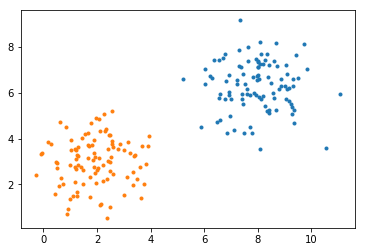

In [95]:
# generate D1 and D2 , also plot them

D1_input, D1_target = generateDataSet(n, mx1, vx1, my1, vy1, 0)
D2_input, D2_target = generateDataSet(n, mx2, vx2, my2, vy2, 1)


train_input = np.append(D1_input, D2_input, axis=0)
train_target = np.append(D1_target, D2_target, axis=0)

plt.plot(D1_input[:, 0], D1_input[:, 1], '.', label="D1")
plt.plot(D2_input[:, 0], D2_input[:, 1], '.', label="D2")
plt.show()

In [810]:
# save generated data set
np.savetxt('train_dataset.csv', np.dstack((train_input[:,0], train_input[:,1], train_target))[0], delimiter=',')

In [1558]:
# initial parameter
X = np.array([convertFeature(xv) for xv in train_input])
w = np.array([0 for _ in range(3)], dtype='float64')

convergence = 10**-3
max_convergence = 10
max_iter = 1000
enable_Hession = True

current_convergence = 0
current_iter = 0
while(True):
    gradient = np.matmul(X.T , train_target -  1/(1 + np.exp(-1 * np.matmul(X, w))) )
    #print('gradient  \t' + str(gradient))
    D = 1-(1/(1+np.exp(-1*np.matmul(X, w))))
    D = np.matmul(generateHessionEye(1/(1+np.exp(-1*np.matmul(X, w)))), D)
    D = generateHessionEye(D)
    Hession = np.matmul(np.matmul(X.T, D), X)
    #print('hession   \t' + str(Hession))
    #print('orig  of w\t' + str(w))
    if (np.linalg.det(Hession)!=0 and enable_Hession):
        #print('[{:3d}] use Hession'.format(current_iter))
        delta = np.matmul(np.linalg.inv(Hession), gradient)
    else:
        #print('[{:3d}] use gradient'.format(current_iter))
        delta = gradient
    w += delta
    
    if (np.alltrue(abs(delta) < convergence)):
        current_convergence += 1
        if (current_convergence == max_convergence):
            break;
    else:
        current_convergence = 0
    
    current_iter += 1
    if (current_iter == max_iter):
        break
    #print('after of w\t' + str(w))
    
print('use {} count to get convergence'.format(current_iter))

use 77 count to get convergence


[298.80783097 -49.6173371  -16.03425753]


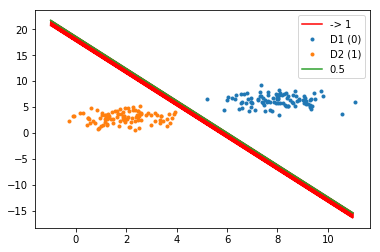

In [1559]:
x = np.linspace(-1,11, 1000)
y = [-1*((i*w[1] + w[0])/w[2]) for i in x]
y_1 = [y[i]+(1/w[2])*abs(w[2]) if i%2==0 else y[i] for i in range(len(y))]
#y_1_dis = crossAddList(y_1, y)
#x_dis = crossAddList(x, x)
print(w)
plt.plot(x,y_1, 'r', label='-> 1')
plt.plot(D1_input[:, 0], D1_input[:, 1], '.', label="D1 (0)")
plt.plot(D2_input[:, 0], D2_input[:, 1], '.', label="D2 (1)")
plt.plot(x,y, label="0.5")

plt.legend()
plt.show()

In [1560]:
# print confusion matrix and sensitivity, specificity
all_predict = np.round(1/(1+np.exp(-1*np.matmul(X, w))), decimals=20)
D0_result = (all_predict[:n] == train_target[:n])
D1_result = (all_predict[n:] == train_target[n:])

# TP mean true D0 and predict D0
TP = np.count_nonzero(D0_result)
# FN mean true D0 but predict D1
FN = D0_result.shape[0] - TP
# TN mean true D1 and predict D1
TN = np.count_nonzero(D1_result)
# FP mean true D1 but predict D0
FP = D1_result.shape[0] - TN

Markdown('Confusion Matrix <br>' + ShowMatrixByLatex([[TP,FP],[FN,TN]]) + "<br>$sensitivity = {:.6f}$<br>$specificity = {:.6f}$  <br><br>".format(TP/(TP+FN),TN/(FP+TN)))

Confusion Matrix <br>$\begin{bmatrix} 100.000 & 0.000 \\0.000 & 100.000 \end{bmatrix}$<br>$sensitivity = 1.000000$<br>$specificity = 1.000000$  <br><br>

### EM algorithm

- INPUT
    - MNIST training data
    - MNIST training label
- FUNCTION
    - Binning the gray value into 2 bins, each pixel follows a different Binomial distribution independent to others
    - Use EM algorithm to cluster each image into 10 groups
        - determine convergence
- OUTPUT
    - For each group (digit)
        - confusion matrix
        - sensitivity
        - specificity
        
#### E step

#### M step

In [1495]:
from functools import reduce
def showBytesImage(byte, row = 28, col = 28):
    im = [[byte[i*28 + j] for j in range(col)] for i in range(row)]
    
    plt.imshow(im, cmap='gray', vmin=0, vmax=1)

def showPofDigit(m, row=2, col=5, imsize=28):
    m2 = m.reshape((row*col,imsize,imsize))
    m2 = (np.concatenate((m2[:col]), axis=1), np.concatenate((m2[col:]), axis=1))
    m2 = np.concatenate(m2, axis=0)
    plt.figure(figsize=(10,10))
    plt.imshow(m2, cmap='gray', vmin=0, vmax=1)
    plt.xticks([i*imsize + (imsize/2) for i in range(col)],[str(i) for i in range(col)])
    plt.yticks([i*imsize + (imsize/2) for i in range(row)],[str(i*col) for i in range(row)])
    

def showInfo(k,p,k_update,p_update):
    k_delta = (k - k_update)**2
    p_delta = (p - p_update)**2
    
    fig, ytick1 = plt.subplots()
    ytick2 = ytick1.twinx()
    
    ytick1.plot(k_update, 'b', label='updated digit')
    ytick2.plot(k_delta, 'r-',label='delta digit')
    ytick1.legend()
    ytick2.legend()
    plt.show()
    
    markdown_str = ''
    markdown_str += r"$ \bigtriangledown_{k} $ = "+str(k_delta) + '<br>'
    markdown_str += r"$ \bigtriangledown_{p} $ = "+str(np.sum(p_delta, axis=1)) + '<br>'
    
    return markdown_str,k_delta,p_delta


In [1463]:
class load_MNIST():
    def __init__(self, data, label, bins=0):
        self.dataname = data
        self.labelname = label
        self.datas, self.datas_n_dims = load_MNIST.load_idx_file(self.dataname)
        self.labels, self.labels_n_dims = load_MNIST.load_idx_file(self.labelname)
        if bins != 0:
            self.bins = self.datas >> int(math.log(256/bins,2))
        else:
            self.bins = self.datas
    
    @staticmethod
    def load_idx_file(filename):
        
        with open(filename, mode='rb') as f:
            magic_number = f.read(4)
            
            n_dim = magic_number[-1]
            
            n_dims = [int.from_bytes(f.read(4), byteorder='big') for _ in range(n_dim)]
            
            
            datas = f.read(reduce(lambda x,y: x*y, (n_dims[:] + [1])))
                
            datas = np.frombuffer(datas, dtype="uint8")
                
            datas = np.reshape(datas,(n_dims[0],reduce(lambda x,y: x*y, (n_dims[1:] + [1]))))
        
        return datas, n_dims

In [898]:
# load train dataset

train_dataset = load_MNIST('train-images.idx3-ubyte', 'train-labels.idx1-ubyte', bins=2)

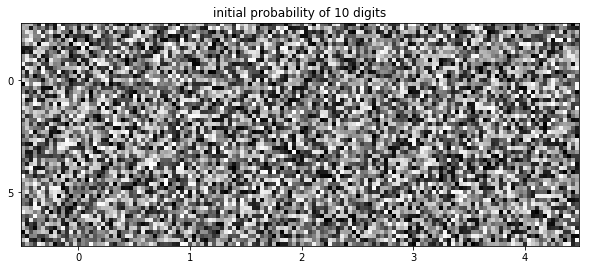

In [1467]:
# initial parameter

digit_number = 10
# probability of group
k = np.ones(digit_number) / digit_number
# probability of pixel in each group
#p = np.ones((digit_number,784)) / 2
p = np.random.rand(digit_number, 784)
initial_p = p.copy()
# zero threshold
zthreshold = 10**-10

showPofDigit(p)
plt.title("initial probability of {} digits".format(digit_number))
plt.show()

def mylog(m):
    #return np.log1p(m)
    return np.log(np.where(m > zthreshold, m, zthreshold))

# return w responsibility
def Estep(X, k, p):
    pixel1 = np.matmul(X, mylog(p.T))
    pixel0 = np.matmul(1 - X, mylog(1 - p.T))
    w = pixel1 + pixel0 + mylog(k)
    w = (w.T - np.max(w, axis=1)).T
    w = np.exp(w)
    w = (w.T / np.sum(w, axis=1)).T
    return w

# return update value
def Mstep(X, w, k, p):
    w_sum = np.sum(w, axis=0)

    k_update = w_sum / w.shape[0]
    p_update = (np.matmul(X.T, w) / w_sum).T
    
    return k_update, p_update

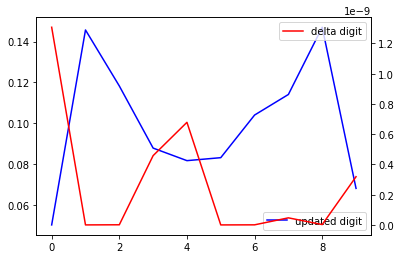

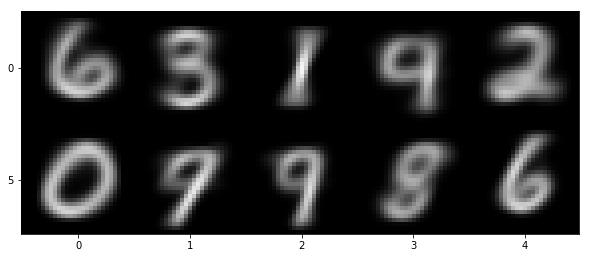

**[   0] iteration** <br>$ \bigtriangledown_{k} $ = [1.30724400e-09 8.75795198e-14 9.03886388e-13 4.58185020e-10
 6.78484691e-10 1.90169529e-14 5.35377973e-13 4.67839007e-11
 2.34667706e-12 3.18756014e-10]<br>$ \bigtriangledown_{p} $ = [2.65834236e-05 2.22437295e-07 5.99722094e-09 1.46790369e-06
 2.37878802e-06 1.41060724e-07 6.64641308e-08 1.44133797e-07
 1.46257041e-07 4.95886989e-06]<br>

In [1501]:

convergence = 10**-6
max_convergence = 10
max_iter = 30
enable_Hession = True

current_convergence = 0
current_iter = 0
while(True):
    clear_output(wait=True)
    # E step
    
    # w : 60000 x digit_number
    w = Estep(train_dataset.bins, k, p)
    
    # M step
    
    k_update, p_update = Mstep(train_dataset.bins, w, k, p)
    
    mstr,k_delta,p_delta = showInfo(k,p,k_update,p_update)
    
    k = k_update
    p = p_update
    
    showPofDigit(p)
    plt.show()
    
    mstr = "**[{:4d}] iteration** <br>".format(current_iter) + mstr
    display(Markdown(mstr))
    
    current_iter += 1
    if (current_iter > max_iter):
        break
        
    if(np.alltrue(k_delta < convergence) and np.alltrue(p_delta < convergence)):
        break

In [1486]:
# save value of good result
np.save('initial_p', initial_p)
np.save('updated_p', p_update)

### Test result

it is $10x10$ matrix
- col mean real label (0-9)
- row mean digit cluster

we can find digit cluster is belong to which label

```python
np.argmax(test_result, axis=1)
```

also can find real label is belong to which digit cluster

```python
np.argmax(test_result, axis=0)
```

In [1529]:
test_result = np.zeros((10,10))
test_w = Estep(train_dataset.bins, k, p)

test_w_max = np.argmax(test_w, axis=1)

for i in range(test_result.shape[0]):
    for j in range(test_result.shape[1]):
        test_result[i][j] = np.count_nonzero(train_dataset.labels[test_w_max == i] == j)
        
Markdown(ShowMatrixByLatex(test_result,dtype="int"))

$\begin{bmatrix} 111 & 8 & 372 & 34 & 70 & 49 & 2315 & 7 & 30 & 9 \\255 & 35 & 513 & 4121 & 0 & 1879 & 37 & 26 & 1776 & 100 \\0 & 6166 & 115 & 173 & 35 & 38 & 78 & 152 & 272 & 73 \\10 & 9 & 135 & 101 & 2292 & 194 & 10 & 825 & 138 & 1552 \\7 & 25 & 4475 & 284 & 23 & 11 & 9 & 31 & 34 & 4 \\4694 & 0 & 53 & 34 & 6 & 83 & 44 & 15 & 35 & 24 \\3 & 6 & 11 & 19 & 1649 & 76 & 1 & 2759 & 98 & 1618 \\5 & 55 & 19 & 195 & 1421 & 163 & 1 & 2340 & 180 & 2463 \\574 & 406 & 213 & 1083 & 199 & 2774 & 115 & 110 & 3251 & 103 \\264 & 32 & 52 & 87 & 147 & 154 & 3308 & 0 & 37 & 3 \end{bmatrix}$

In [1540]:
np.argmax(test_result, axis=1), np.argmax(test_result, axis=0)

(array([6, 3, 1, 4, 2, 0, 7, 9, 8, 6]), array([5, 2, 4, 1, 3, 8, 9, 6, 8, 7]))

In [1541]:
np.argmax(test_result, axis=1)[np.argmax(test_result, axis=0)] == range(10)

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True])

In [1543]:
digit_label = np.argmax(test_result, axis=0)
digit_label[5] = 0
digit_label

array([5, 2, 4, 1, 3, 0, 9, 6, 8, 7])

In [1555]:
# show confustion matrix and sensitivity, specificity
confustion_str = ''

for label,digit in enumerate(digit_label):
    TP = np.count_nonzero( train_dataset.labels[test_w_max == digit] == label )
    FP = np.count_nonzero( train_dataset.labels[test_w_max == digit] != label )
    FN = np.count_nonzero( train_dataset.labels[test_w_max != digit] == label )
    TN = np.count_nonzero( train_dataset.labels[test_w_max != digit] != label )
    
    confustion_str += "label == {} , digit cluster == {} <br><br>".format(label, digit) 
    confustion_str += ShowMatrixByLatex([[TP,FP],[FN,TN]], dtype="int") + "<br>"
    confustion_str += "<br>$sensitivity = {:.6f}$<br>$specificity = {:.6f}$  <br><br>".format(TP/(TP+FN),TN/(FP+TN))

Markdown(confustion_str)

label == 0 , digit cluster == 5 <br><br>$\begin{bmatrix} 4694 & 294 \\1229 & 53783 \end{bmatrix}$<br><br>$sensitivity = 0.792504$<br>$specificity = 0.994563$  <br><br>label == 1 , digit cluster == 2 <br><br>$\begin{bmatrix} 6166 & 936 \\576 & 52322 \end{bmatrix}$<br><br>$sensitivity = 0.914565$<br>$specificity = 0.982425$  <br><br>label == 2 , digit cluster == 4 <br><br>$\begin{bmatrix} 4475 & 428 \\1483 & 53614 \end{bmatrix}$<br><br>$sensitivity = 0.751091$<br>$specificity = 0.992080$  <br><br>label == 3 , digit cluster == 1 <br><br>$\begin{bmatrix} 4121 & 4621 \\2010 & 49248 \end{bmatrix}$<br><br>$sensitivity = 0.672158$<br>$specificity = 0.914218$  <br><br>label == 4 , digit cluster == 3 <br><br>$\begin{bmatrix} 2292 & 2974 \\3550 & 51184 \end{bmatrix}$<br><br>$sensitivity = 0.392331$<br>$specificity = 0.945087$  <br><br>label == 5 , digit cluster == 0 <br><br>$\begin{bmatrix} 49 & 2956 \\5372 & 51623 \end{bmatrix}$<br><br>$sensitivity = 0.009039$<br>$specificity = 0.945840$  <br><br>label == 6 , digit cluster == 9 <br><br>$\begin{bmatrix} 3308 & 776 \\2610 & 53306 \end{bmatrix}$<br><br>$sensitivity = 0.558973$<br>$specificity = 0.985651$  <br><br>label == 7 , digit cluster == 6 <br><br>$\begin{bmatrix} 2759 & 3481 \\3506 & 50254 \end{bmatrix}$<br><br>$sensitivity = 0.440383$<br>$specificity = 0.935219$  <br><br>label == 8 , digit cluster == 8 <br><br>$\begin{bmatrix} 3251 & 5577 \\2600 & 48572 \end{bmatrix}$<br><br>$sensitivity = 0.555632$<br>$specificity = 0.897006$  <br><br>label == 9 , digit cluster == 7 <br><br>$\begin{bmatrix} 2463 & 4379 \\3486 & 49672 \end{bmatrix}$<br><br>$sensitivity = 0.414019$<br>$specificity = 0.918984$  <br><br>

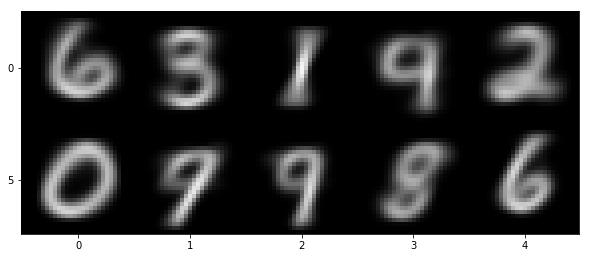

In [1556]:
showPofDigit(p)